In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
import numpy as np
from datetime import datetime 
import ssl
from glob import glob
import matplotlib.pyplot as plt
import os
import cv2
import seaborn as sns

In [2]:
DATADIR = 'Dataset2'

IMAGE_SIZE = [128, 128]
 
train_path = DATADIR+'/train'
valid_path = DATADIR+'/test'

In [3]:
labels = ['2S1','BRDM_2','BTR_60','D7','SLICY','T62','ZIL131','ZSU_23_4']

In [4]:
resnet50 = ResNet50(input_shape=IMAGE_SIZE + [3], 
              weights='imagenet',
              include_top=False)

In [5]:
for layer in resnet50.layers:
    layer.trainable = False

In [6]:
num_classes = glob("Dataset2/train/*")
num_classes

print(len(num_classes))

8


In [7]:
x = Flatten()(resnet50.output)
prediction = Dense(len(num_classes), activation='softmax')(x)
model = Model(inputs=resnet50.input, outputs=prediction)
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 134, 134, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 64, 64, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 64, 64, 64)   256         ['conv1_conv[0][0]']         

 conv2_block3_2_conv (Conv2D)   (None, 32, 32, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 32, 32, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 32, 32, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_3_conv (Conv2D)   (None, 32, 32, 256)  16640       ['conv2_block3_2_relu[0][0]']    
                                                                                                  
 conv2_blo

 conv3_block3_2_conv (Conv2D)   (None, 16, 16, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 16, 16, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 16, 16, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_3_conv (Conv2D)   (None, 16, 16, 512)  66048       ['conv3_block3_2_relu[0][0]']    
                                                                                                  
 conv3_blo

 conv4_block2_2_conv (Conv2D)   (None, 8, 8, 256)    590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 8, 8, 256)   1024        ['conv4_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_2_relu (Activatio  (None, 8, 8, 256)   0           ['conv4_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_3_conv (Conv2D)   (None, 8, 8, 1024)   263168      ['conv4_block2_2_relu[0][0]']    
                                                                                                  
 conv4_blo

 conv4_block5_2_relu (Activatio  (None, 8, 8, 256)   0           ['conv4_block5_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_3_conv (Conv2D)   (None, 8, 8, 1024)   263168      ['conv4_block5_2_relu[0][0]']    
                                                                                                  
 conv4_block5_3_bn (BatchNormal  (None, 8, 8, 1024)  4096        ['conv4_block5_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_add (Add)         (None, 8, 8, 1024)   0           ['conv4_block4_out[0][0]',       
                                                                  'conv4_block5_3_bn[0][0]']      
          

 conv5_block2_2_relu (Activatio  (None, 4, 4, 512)   0           ['conv5_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block2_3_conv (Conv2D)   (None, 4, 4, 2048)   1050624     ['conv5_block2_2_relu[0][0]']    
                                                                                                  
 conv5_block2_3_bn (BatchNormal  (None, 4, 4, 2048)  8192        ['conv5_block2_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_add (Add)         (None, 4, 4, 2048)   0           ['conv5_block1_out[0][0]',       
                                                                  'conv5_block2_3_bn[0][0]']      
          

In [8]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
  )

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   )
 
test_datagen = ImageDataGenerator(rescale = 1./255
                                  )
 
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (IMAGE_SIZE),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
 
test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (IMAGE_SIZE),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 6623 images belonging to 8 classes.
Found 953 images belonging to 8 classes.


In [10]:
history = model.fit(
    training_set,
    validation_data = test_set,
    epochs=50,
    steps_per_epoch = len(training_set),
    validation_steps = len(test_set)
)

Epoch 1/50
207/207 [==============================] - 42s 161ms/step - loss: 1.6591 - accuracy: 0.3873 - val_loss: 1.4317 - val_accuracy: 0.4229
Epoch 2/50
207/207 [==============================] - 27s 130ms/step - loss: 1.3400 - accuracy: 0.5301 - val_loss: 1.2957 - val_accuracy: 0.5320
Epoch 3/50
207/207 [==============================] - 27s 130ms/step - loss: 1.1894 - accuracy: 0.5727 - val_loss: 1.2481 - val_accuracy: 0.5068
Epoch 4/50
207/207 [==============================] - 27s 132ms/step - loss: 1.1174 - accuracy: 0.5904 - val_loss: 1.1097 - val_accuracy: 0.5561
Epoch 5/50
207/207 [==============================] - 28s 133ms/step - loss: 1.0390 - accuracy: 0.6240 - val_loss: 1.0569 - val_accuracy: 0.5824
Epoch 6/50
207/207 [==============================] - 28s 136ms/step - loss: 1.0032 - accuracy: 0.6317 - val_loss: 0.9637 - val_accuracy: 0.6327
Epoch 7/50
207/207 [==============================] - 27s 132ms/step - loss: 0.9581 - accuracy: 0.6624 - val_loss: 1.0143 - val_ac

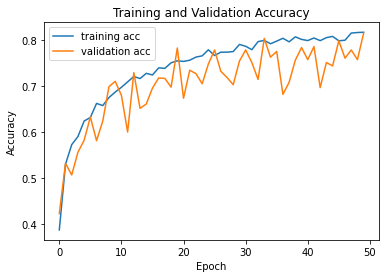

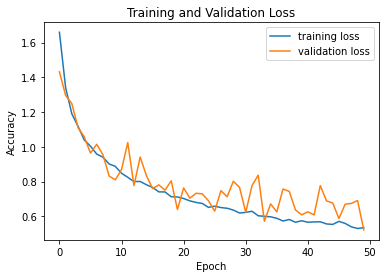

In [11]:
import matplotlib.pyplot as plt
# plot the accuracy
plt.plot(history.history['accuracy'], label='training acc')
plt.plot(history.history['val_accuracy'], label='validation acc')
plt.title('Training and Validation Accuracy')
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend()
plt.show()
#plt.savefig('AccVal_acc')
 
# plot the loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Training and Validation Loss')
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend()
plt.show()
#plt.savefig('LossVal_loss')

In [12]:
model.evaluate(test_set)

30/30 [==============================] - 2s 49ms/step - loss: 0.5213 - accuracy: 0.8153


[0.5212773680686951, 0.8153200149536133]

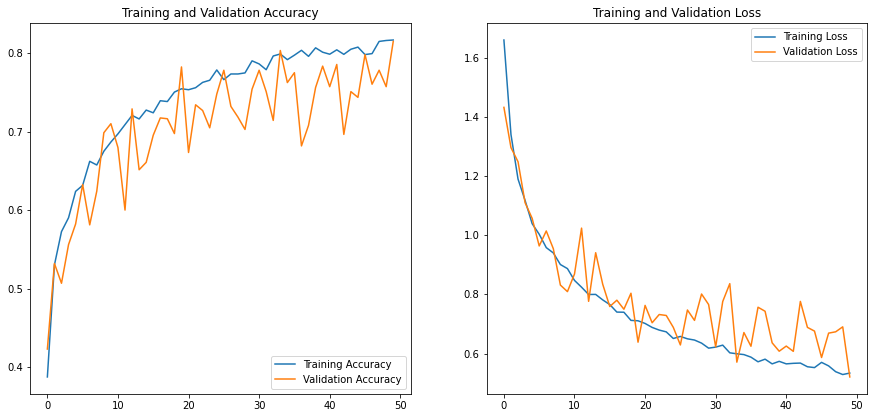

30/30 [==============================] - 3s 53ms/step
              precision    recall  f1-score   support

         2S1       0.07      0.08      0.08       118
      BRDM_2       0.16      0.10      0.12       142
      BTR_60       0.14      0.17      0.15       136
          D7       0.05      0.05      0.05        58
       SLICY       0.16      0.16      0.16       127
         T62       0.13      0.17      0.15       116
      ZIL131       0.12      0.12      0.12       115
    ZSU_23_4       0.17      0.14      0.16       141

    accuracy                           0.13       953
   macro avg       0.12      0.12      0.12       953
weighted avg       0.13      0.13      0.13       953

[[ 9 13 23  9 12 23 15 14]
 [15 14 23  7 22 26 20 15]
 [20 14 23 10 19 22 11 17]
 [ 3  5  5  3 14  9  8 11]
 [17  8 21  7 20 20 17 17]
 [20  8 20  8 14 20 15 11]
 [16 10 26 10 12 16 14 11]
 [21 16 24 12 13 18 17 20]]


C:\Users\Chlangdiam Sumer\AppData\Local\Temp\ipykernel_13524\2377349459.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
C:\Users\Chlangdiam Sumer\AppData\Local\Temp\ipykernel_13524\2377349459.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


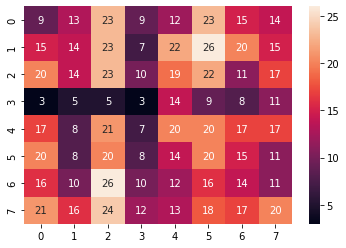

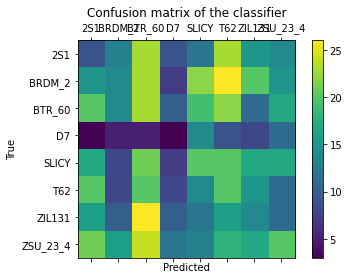

              precision    recall  f1-score   support

         2S1       0.07      0.08      0.08       118
      BRDM_2       0.16      0.10      0.12       142
      BTR_60       0.14      0.17      0.15       136
          D7       0.05      0.05      0.05        58
       SLICY       0.16      0.16      0.16       127
         T62       0.13      0.17      0.15       116
      ZIL131       0.12      0.12      0.12       115
    ZSU_23_4       0.17      0.14      0.16       141

    accuracy                           0.13       953
   macro avg       0.12      0.12      0.12       953
weighted avg       0.13      0.13      0.13       953



In [13]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

from sklearn.metrics import classification_report
import seaborn as sns
predictions = np.argmax(model.predict(test_set), axis=-1)
from sklearn.metrics import confusion_matrix
print(classification_report(test_set.classes, predictions, target_names = ['2S1','BRDM_2','BTR_60','D7','SLICY','T62','ZIL131','ZSU_23_4']))

cm = confusion_matrix(test_set.classes, predictions) 
sns.heatmap(cm, annot= True, fmt='d')

print(cm) 

fig = plt.figure() 

ax = fig.add_subplot(111) 

cax = ax.matshow(cm) 

plt.title('Confusion matrix of the classifier') 

fig.colorbar(cax) 

ax.set_xticklabels([''] + labels) 

ax.set_yticklabels([''] + labels) 

plt.xlabel('Predicted') 

plt.ylabel('True') 

plt.show()





print(classification_report(test_set.classes, predictions, target_names = ['2S1','BRDM_2','BTR_60','D7','SLICY','T62','ZIL131','ZSU_23_4']))